<a href="https://colab.research.google.com/github/Mayankjain0807/Machine_learning_projects/blob/Machine-Learning-Projects/Cardiovascular_Risk_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **CARDIOCASCULAR RISK PREDICTION**



#  **Project Type**    - **Classification**
## **Contribution**    - Individual - **Mayank Jain.**


# **Project Summary -**

# The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **GitHub Link -**

https://github.com/Mayankjain0807/Machine_learning_projects/blob/Machine-Learning-Projects/Cardiovascular_Risk_prediction_ipynb.ipynb

# **Problem Statement**


# Between 1990 and 2020, coronary heart disease alone is anticipated to increase by 120% for women and 137% for men in developing countries, according to WHO. Various factors are responsible for this heart disease. In this model, we predict whether the patient has a 10- year risk of future of CHD or not. With the help of the given patient health data, we find out which factors are mainly responsible for the disease. This model helps us to save the lives of patients in the coming future.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Import Libraries
import io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from numpy import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV



from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import files
risk = files.upload()


Saving data_cardiovascular_risk.csv to data_cardiovascular_risk.csv


### Dataset First View

In [ ]:
# Dataset First Look

data = pd.read_csv(io.BytesIO(risk['data_cardiovascular_risk.csv']))
data.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

data.shape

# There are 3390 rows and 17 columns

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info

data.info()

# There are 2 columns which are object type while others are numerical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

data[data.duplicated()]

# There is no duplicate values in our dataset.

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

data.isnull().sum()

# There are 7 columns in which null values are present inthe dataset i.e education, cigsperday, BPMeds, totchol, BMI, heartrate and glucose.

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Missing Values in the form of percentage.
null_value_percentage = (data.isnull().sum()/ len(data))*100
null_value_percentage.round(1)

id                 0.0
age                0.0
education          2.6
sex                0.0
is_smoking         0.0
cigsPerDay         0.6
BPMeds             1.3
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.1
sysBP              0.0
diaBP              0.0
BMI                0.4
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64

### In our dataset, **9%**  null values are present in glucose , **2.6%** in Education column, **1.3%** in BPMeds, **1.1%** in totchol, **0.6%** in cigsperday and **0.4%** in BMI

<Axes: >

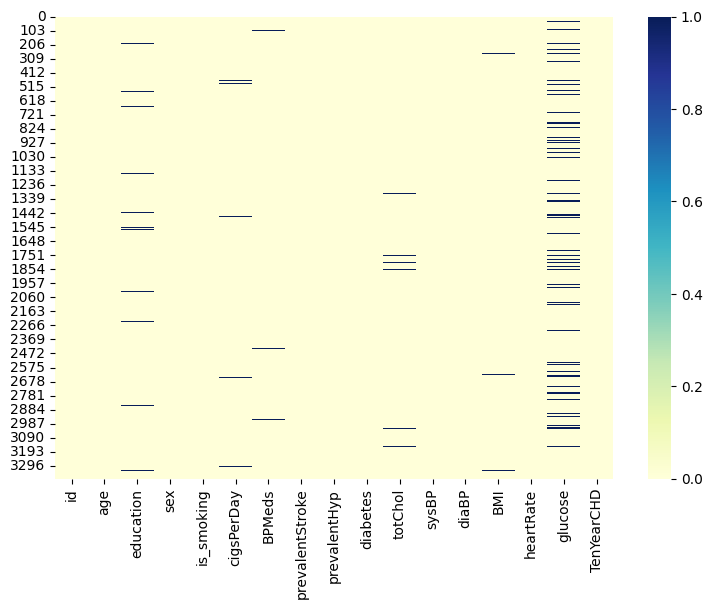

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(9,6))
sns.heatmap(data.isnull(),cmap="YlGnBu",cbar={'label': 'Missing Data'})


## What did you know about your dataset?

#### 1. There are 3390 rows and 17 columns in our dataset out of which 2 columns are object datatype while remaining are numerical.

#### 2. There are no duplicate values in our dataset.

#### 3. There are **7 columns** in which null values are present in our  dataset i.e **education, cigsperday, BPMeds, totchol, BMI, heartrate and glucose**.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe

data.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

1. Id - Patients unique id

2. Age - Patient age

3. Education - Education certificate (10-1,12-2,Graduation-3, PG- 4)

4. Sex - Patient age

5. is_smoking  - Wheteher smoking currently or not

6. cigsPerDay  - cigrattes smoked per day.

7. BPMeds -  Whether taking BP meds or not

8. prevalentStroke - If the patient has a history of stroke

9. prevalentHyp - If the patient has a history of hypertension

10. diabetes - Patient diabetes or not

11. totChol - Cholesterol measure

12. sysBP  - BP measure

13. diaBP  - BP measure

14. BMI   - Body mass index

15. heartRate - Heart rate measure

16. glucose  -  Glucose measure

17. TenYearCHD - Risk prediction value

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for x in data.columns:
  print("No. of unique values in ",x,"is",data[x].nunique())


No. of unique values in  id is 3390
No. of unique values in  age is 39
No. of unique values in  education is 4
No. of unique values in  sex is 2
No. of unique values in  is_smoking is 2
No. of unique values in  cigsPerDay is 32
No. of unique values in  BPMeds is 2
No. of unique values in  prevalentStroke is 2
No. of unique values in  prevalentHyp is 2
No. of unique values in  diabetes is 2
No. of unique values in  totChol is 240
No. of unique values in  sysBP is 226
No. of unique values in  diaBP is 142
No. of unique values in  BMI is 1259
No. of unique values in  heartRate is 68
No. of unique values in  glucose is 132
No. of unique values in  TenYearCHD is 2


## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Make a copy of our dataset

df = data.copy()

In [ ]:
# Make a column name- CHD_risk who has a posotive for 10 year risk of coronary heart disease.

df['CHD_risk'] = df.loc[df['TenYearCHD']== 1]['TenYearCHD']
df['CHD_risk'].value_counts()


1.0    511
Name: CHD_risk, dtype: int64

##We find that, there are **511** patients who have a future risk of CHD. This is calculated before the filling of Null values.

In [ ]:
# Write your code to make your dataset analysis ready.
# Here we use groupby some columns with our target variable i.e risk of CHD in future to check which type of persons have a high risk of CHD in future.

# Here we groupy by the heartrate , totchol and CHD_risk column
pd.DataFrame(df.groupby(['heartRate','totChol'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))


heartRate  totChol  CHD_risk  Count
0       65.0    260.0       1.0      4
1       85.0    241.0       1.0      2
2       80.0    286.0       1.0      2
3       96.0    266.0       1.0      2
4       75.0    193.0       1.0      2

In [ ]:
# Here we groupy by the 'diabetes','glucose' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(['diabetes','glucose'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

diabetes  glucose  CHD_risk  Count
0         0     75.0       1.0     22
1         0     83.0       1.0     21
2         0     77.0       1.0     17
3         0     76.0       1.0     17
4         0     72.0       1.0     17

In [ ]:
# Here we groupy by the 'age' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(df['age']>50)['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

age  CHD_risk  Count
0   True       1.0    342
1  False       1.0    169

In [ ]:
# Here we groupy by the 'sex' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(df['sex'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

sex  CHD_risk  Count
0   M       1.0    272
1   F       1.0    239

In [ ]:
# Here we groupy by the 'is_smoking' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(df['is_smoking'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

is_smoking  CHD_risk  Count
0        YES       1.0    275
1         NO       1.0    236

In [ ]:
# Here we groupy by the 'sysBP','diaBP' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(['sysBP','diaBP'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

sysBP  diaBP  CHD_risk  Count
0  133.0   83.0       1.0      4
1  120.0   80.0       1.0      4
2  146.0   89.0       1.0      3
3  127.5   80.0       1.0      3
4  168.0  102.0       1.0      2

In [ ]:
# Here we groupy by the 'prevalentstroke','prevalentHyp','BPMeds' and 'CHD_risk' column to find the risk in future.

pd.DataFrame(df.groupby(['prevalentStroke','prevalentHyp','BPMeds'])['CHD_risk'].value_counts().sort_values(ascending = False).reset_index(name="Count").head(5))

prevalentStroke  prevalentHyp  BPMeds  CHD_risk  Count
0                0             0     0.0       1.0    253
1                0             1     0.0       1.0    210
2                0             1     1.0       1.0     32
3                1             1     0.0       1.0      7
4                1             0     0.0       1.0      1

## What all manipulations have you done and insights you found?

### Here, I groupby some columns with CHD_risk(it contains positive value who have a 10 year CHD risk in future).

**1.** Persons who have a lower than 70 heartrate and more than 250 total cholesterol level have high risk of CHD in future.

**2.** The non-diabetic persons whose glucose level is normal have high risk of CHD in future.

**3.** Male persons have high risk as compare  to female in future.

**4.** The persons whose age has above than 50 have higher risk of CHD in future.

**5.** Smoking persons have high risk of CHD in future according to data.

**6.** Persons who do not have a history of hypertension & stroke and who does not take BP medication have higher risk of CHD in the future.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Lets drop the column name id from the dataset. It does not add any value in our dataset.
df.drop('id',axis = 1, inplace = True)

# Drop the CHD_risk column also that we create above for positive findings of CHD risk.
df.drop('CHD_risk',axis = 1, inplace = True)

In [ ]:
# Lets divide the column into numerical and categorical
numerical_col = []
categorical_col = []
for x in df.columns[:]:
  if df[x].nunique() > 4:
    numerical_col.append(x)
  else:
    categorical_col.append(x)
print('The numerical columns are:',numerical_col)
print('The categorical columns are:',categorical_col)

The numerical columns are: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
The categorical columns are: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


### **Chart - 1 - Univariate, Frequency distribution Histogram graph of numerical column.**

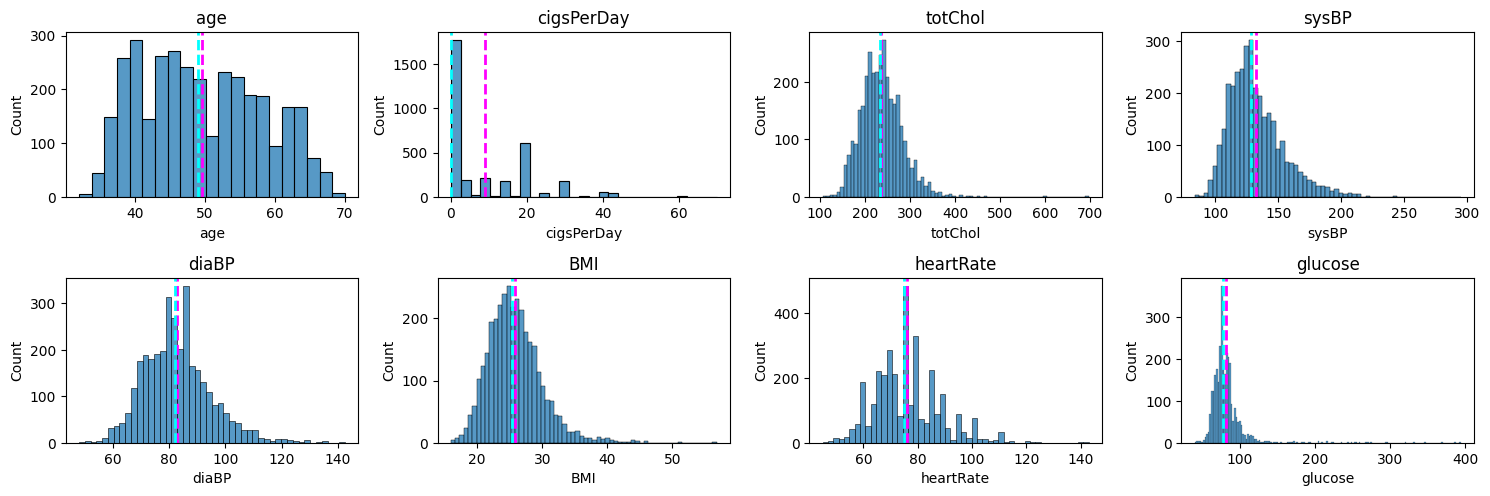

In [ ]:
# Chart - 1 visualization code
fig = plt.figure(figsize=(15, 12))
for n, col in enumerate (numerical_col):
    feature = df[col]
    ax = plt.subplot(5,4,n+1)
    sns.histplot(feature)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
    plt.tight_layout()



##### 1. Why did you pick the specific chart?

To Know the skeweness of individual column

##### 2. What is/are the insight(s) found from the chart?

Most of the data are right skewed, which means the median of the column is less than tge mean.

### ***Chart - 2 - Univariate, Frequency distribution Histogram graph of categorical column.***

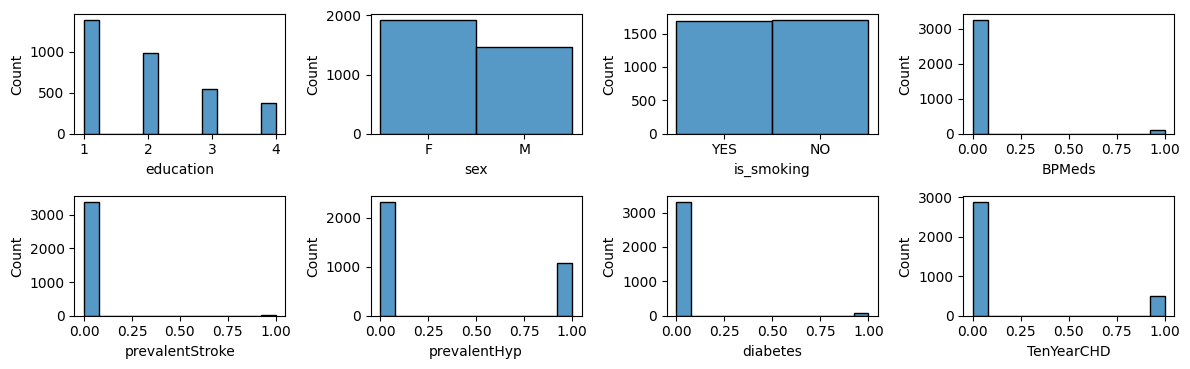

In [ ]:
# Chart - 2 visualization code
fig = plt.figure(figsize=(12,7))
for n, col in enumerate (categorical_col):

    feature = df[col]
    plt.subplot(4,4,n+1)
    sns.histplot(feature)
    # ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    # ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
    plt.tight_layout()

#### **Chart - 3- BIVARIATE, SCATTER PLOT BETWEEN DEPENDENT VARIABLE AND INDEPENDENT VARIABLE (Only Numerical colummn)**

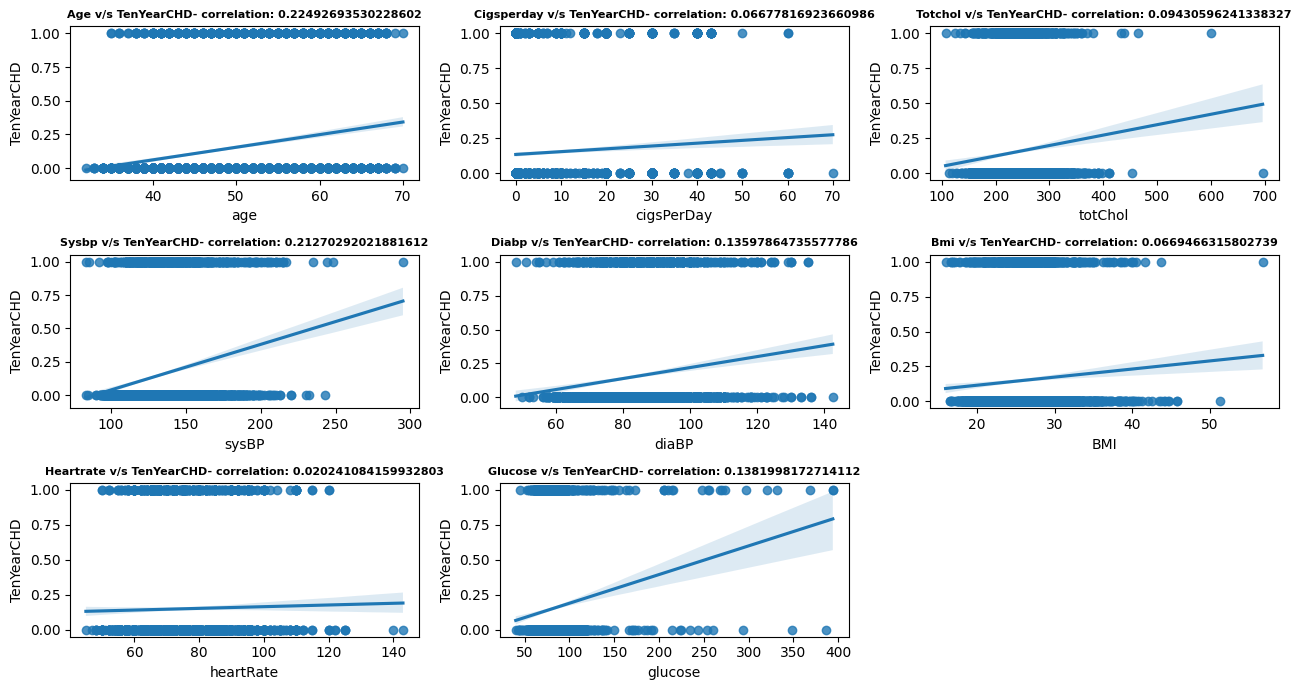

In [ ]:
# Chart - 3 visualization code
# check the correlation between dependent variable and independent variable
fig = plt.figure(figsize=(13,7))
for n, col in enumerate (numerical_col[:]):
  feature = df[col]
  plt.subplot(3,3,n+1)
  label = df['TenYearCHD']
  correlation = feature.corr(label)
  # plt.scatter(x=feature, y=label)
  sns.regplot(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('TenYearCHD')
  plt.title(f'{col.title()} v/s TenYearCHD'+ '- correlation: ' + str(correlation),weight='bold',fontsize = 8)
  # z = np.polyfit(df[col], df['TenYearCHD'],1)
  # y_hat = np.poly1d(z)(df[col])
  # plt.plot(df[col], y_hat, "r--", lw=1)
# plt.show()
plt.tight_layout()


##### 1. Why did you pick the specific chart?

scatter plot helps us to show the data in scatter form.

##### 2. What is/are the insight(s) found from the chart?

With the help of these , we can easily visulaize where all the data scattered. Is it scatterd in a single line or in different.

#### ***Chart - 4- Bivariate- Countplot***

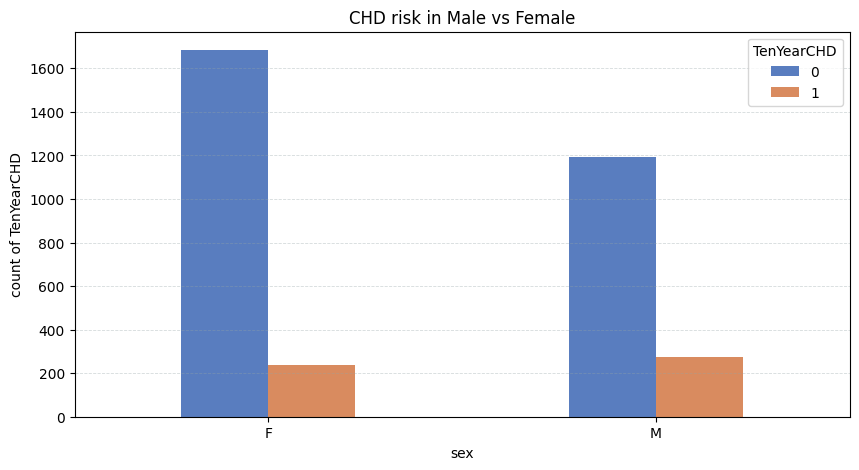

In [ ]:
# Chart - 4 visualization code

# df.groupby(df['sex'])['TenYearCHD'].value_counts().plot(kind="bar",figsize=(10,7))

plt.figure(figsize=(10,5))
plt.title("CHD risk in Male vs Female")
# ax.grid(zorder=0)
sns.countplot(data = df, x= 'sex', hue= 'TenYearCHD', palette="muted", width = 0.45)
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.6, axis='y', alpha=0.4)
plt.ylabel('count of TenYearCHD')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot helps in compariosn between 2 class.

##### 2. What is/are the insight(s) found from the chart?

Here we found that, nearly the percentage of both male and female is same for CHD risk in future.

#### ***Chart - 5 - Bivariate - Distribution plot.***

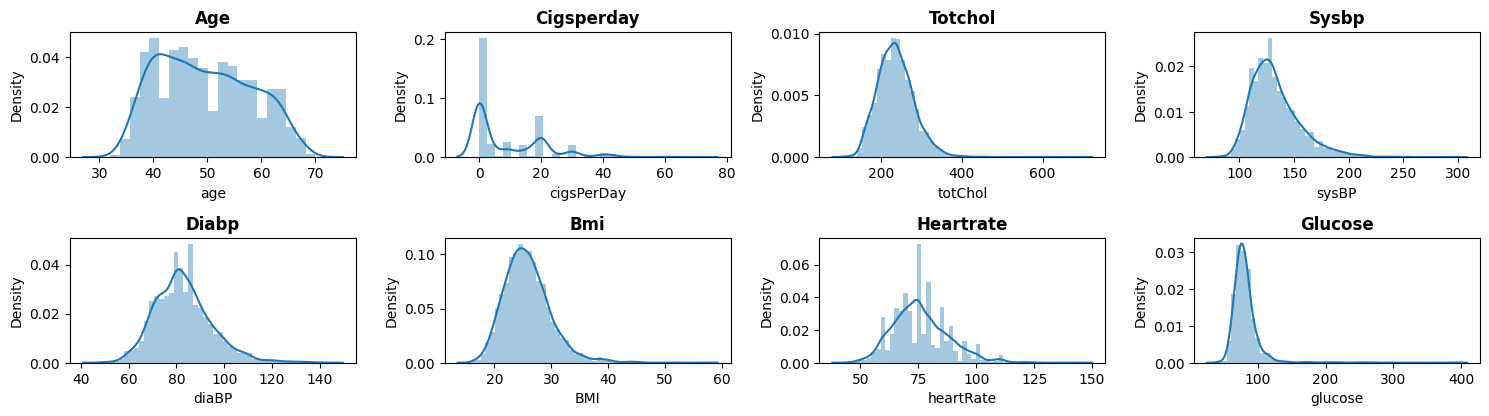

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(15,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

**Distribution plot** helps us to show the clear view of data.

##### 2. What is/are the insight(s) found from the chart?

With the help of this chart, we find out the skeweness of the chart.

#### **Chart - 6 - Univariate - Box plot**

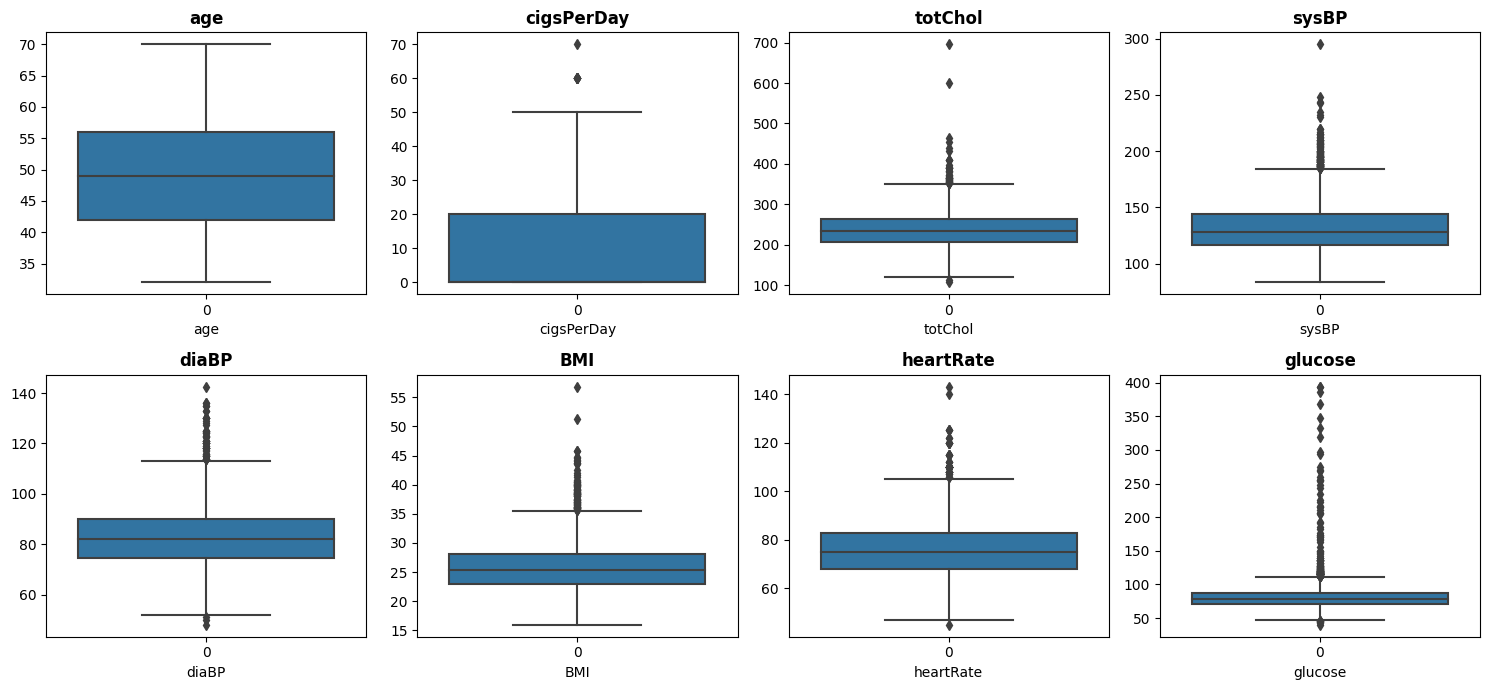

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,7))
for n, col in enumerate (numerical_col[:]):
  plt.subplot(2,4,n+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.title(col, weight ='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

**Box plot** helps us to show the outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

With the help of this box plot, we find all the outliers present in the individual column.

#### **Chart - 7 - Correlation Heatmap**

<Axes: >

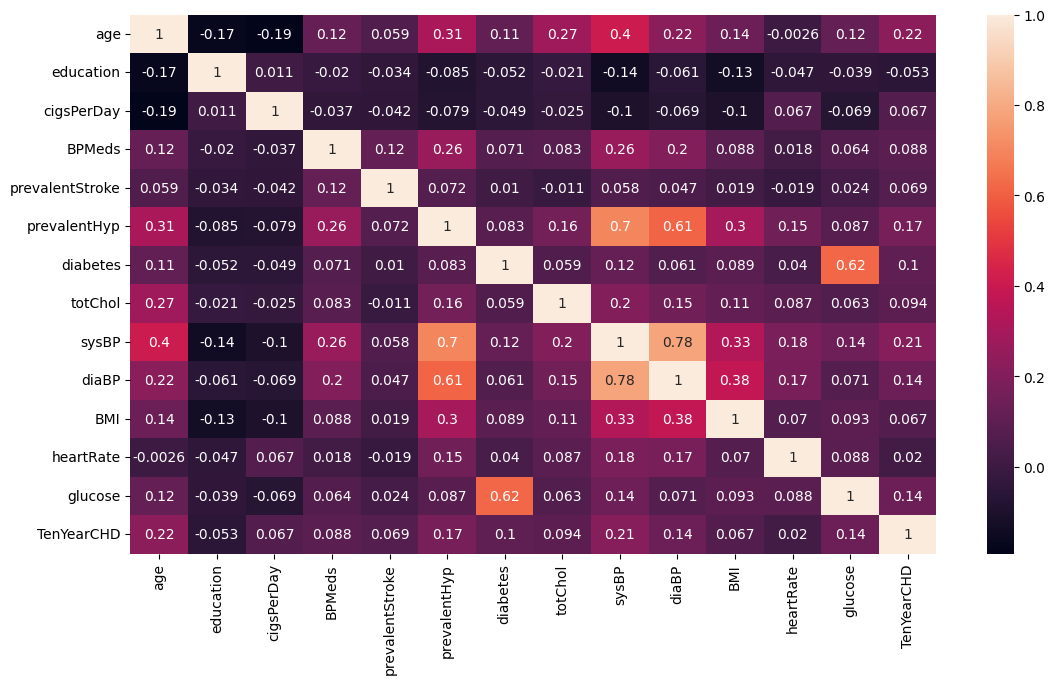

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(13,7))
corr= df.corr()
sns.heatmap(corr, annot=True)

##### 1. Why did you pick the specific chart?

**Coorelation heatmap** help us to visualize the coorelation between all the columns present in our data.

##### 2. What is/are the insight(s) found from the chart?

with the help of this chart, we find the coorelation between columns. Like above, we saw that **sysBP** is highly coorelated with **diaBP**.

#### Chart - 8 - Pair plot

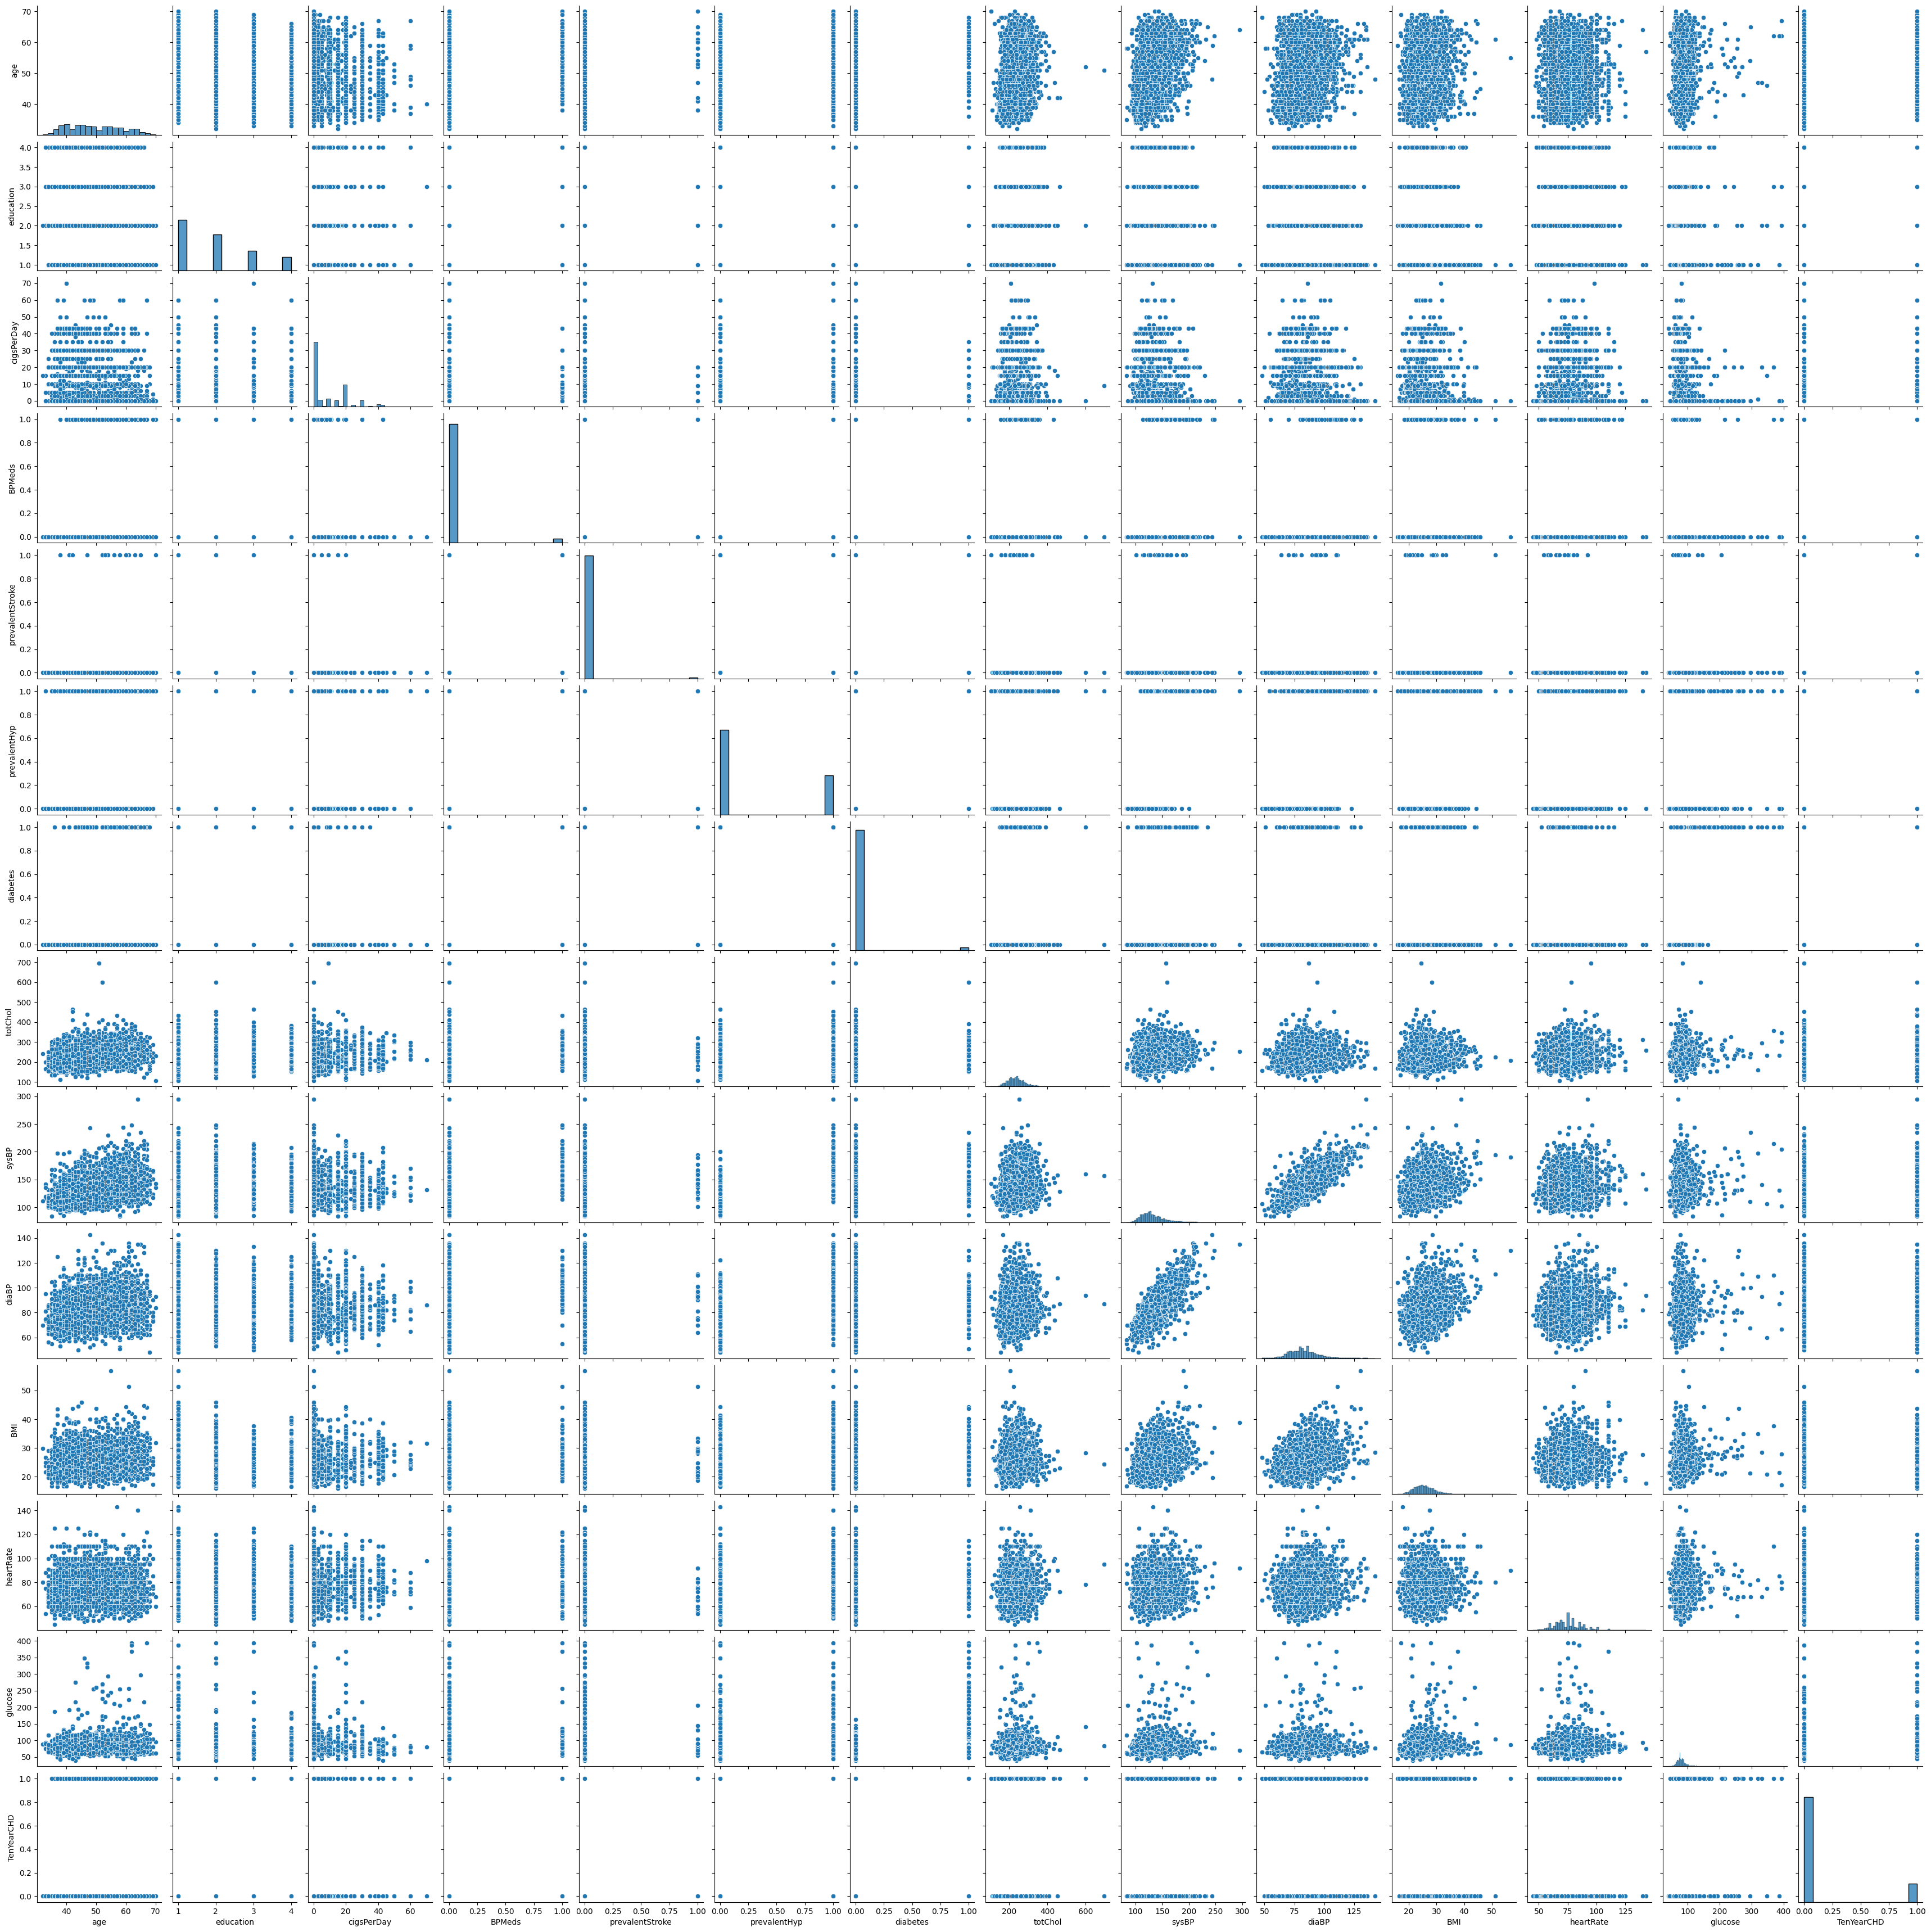

In [ ]:
# Chart - 8 visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

It is a distribution plot to show the marginal distribution of the data in each column. Hence this chart can show link between all columns with each other at a single line code.

##### 2. What is/are the insight(s) found from the chart?

The pair plots showed that their are no link between the columns and hence no important insight was concluded from this chart.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement - 1 - The percentage of male is more as compare to female while smoking the cigrattes.**

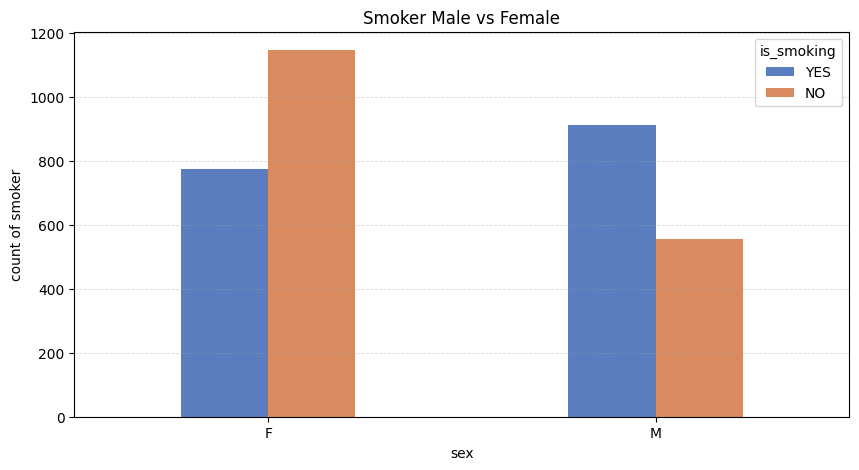

In [ ]:
# pd.DataFrame(df.groupby(df['sex'])['is_smoking'].value_counts())

plt.figure(figsize=(10,5))
plt.title("Smoker Male vs Female")
# ax.grid(zorder=0)
sns.countplot(data = df, x= 'sex', hue= 'is_smoking', palette="muted", width = 0.45)
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.6, axis='y', alpha=0.4)
plt.ylabel('count of smoker')
plt.show()

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As we see in the graph, Male smokers are more as compare to female. So, Null hypothesis is **fail**. our hypothesis is alternative hypothesis.

### **Hypothetical Statement - 2 - The diabetic disease is more found in male as compare to female.**

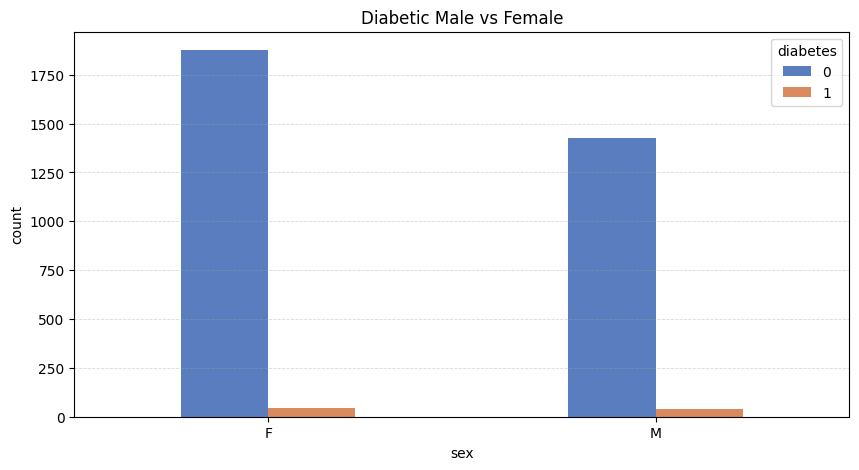

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Diabetic Male vs Female")
# ax.grid(zorder=0)
sns.countplot(data = df, x= 'sex', hue= 'diabetes', palette="muted", width = 0.45)
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.6, axis='y', alpha=0.4)
plt.ylabel('count')
plt.show()

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Here, Null hypothesis is **True** because the result comes is against our hypothesis. Here both diabetic male and diabetic female have same in numbers.

### **Hypothetical Statement - 3 - BP problem is more in female as compare to male. My hypothhesis is Female patients has more in number who have on BP medications as compare to male.**

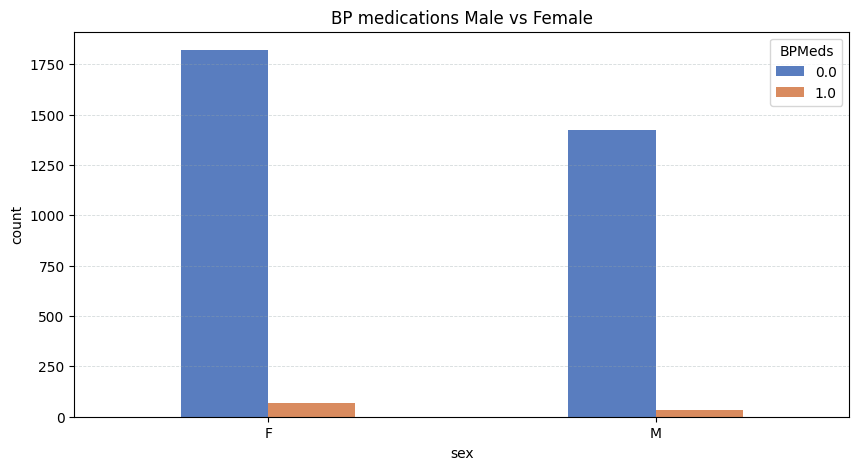

In [ ]:
plt.figure(figsize=(10,5))
plt.title("BP medications Male vs Female")
# ax.grid(zorder=0)
sns.countplot(data = df, x= 'sex', hue= 'BPMeds', palette="muted", width = 0.45)
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.6, axis='y', alpha=0.4)
plt.ylabel('count')
plt.show()

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Our research hypothesis is correct. Here Null hypothesis is fail while proving this. Alternative hypothesis is **True.**

# ***6. Feature Engineering & Data Pre-processing***

### **1. Handling Missing Values**

In [ ]:
# Handling Missing Values & Missing Value Imputation

# We have a very low percentage of missing values in 7 columns , so we can fill them with the median value of that particular column.

missing_col = df.columns[df.isnull().any()].tolist()
print (missing_col)
print('Missing Data Count')
print(df[missing_col].isnull().sum().sort_values(ascending = False))


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64


In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here, we use simple technique i.e median. There are small no. of missing values in our dataset. so we fill all the missng values with median of that particular column.

### **2. Handling Outliers**

In [ ]:
# Handling Outliers & Outlier treatments
# categorical variables
print ('The length of categorical variable is', len(categorical_col))

# Numerical variables

print ('The length of Numerical variable is', len(numerical_col))

The length of categorical variable is 8
The length of Numerical variable is 8


In [ ]:
# Here we handle the outliers of Numerical column. There is no sense of outliers in categorical column.

# here we divide the numerical column into 2 variables : discrete and continuous

# discrete var. are those which are countable. If there are less than 20 numbers of uniques value
# then we consider that column as a discrete column, more than 20 unique value consider as a continuous variable

discrete = []
for var in numerical_col:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [ ]:
continuous = [var for var in numerical_col if var not in discrete]

print('There are {} continuous variables'.format(len(continuous)))
print('The contiuous variables are', continuous)

There are 8 continuous variables
The contiuous variables are ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Find the upper limit, lower limit, and interquartile range of individual continuous column.
new_df = df.copy()
for col in continuous:
  # upper_lim = new_df[col].quantile(.95)
  # lower_lim = new_df[col].quantile(.05)
  # new_df.loc[(new_df[col] > upper_lim),col] = upper_lim
  # new_df.loc[(new_df[col] < lower_lim),col] = lower_lim
  Q1, Q3, median = new_df[col].quantile([0.25,0.75,0.5])
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  print('The upper and lower limit of', col, 'is', upper,'and', lower)

  # Here we use capping method by replacing the outliers with median value.

  new_df[col] = np.where(new_df[col] > upper,median, np.where(new_df[col] < lower, median,new_df[col]))



The upper and lower limit of age is 77.0 and 21.0
The upper and lower limit of cigsPerDay is 50.0 and -30.0
The upper and lower limit of totChol is 351.0 and 119.0
The upper and lower limit of sysBP is 184.5 and 76.5
The upper and lower limit of diaBP is 113.25 and 51.25
The upper and lower limit of BMI is 35.44875 and 15.578750000000005
The upper and lower limit of heartRate is 105.5 and 45.5
The upper and lower limit of glucose is 104.5 and 52.5


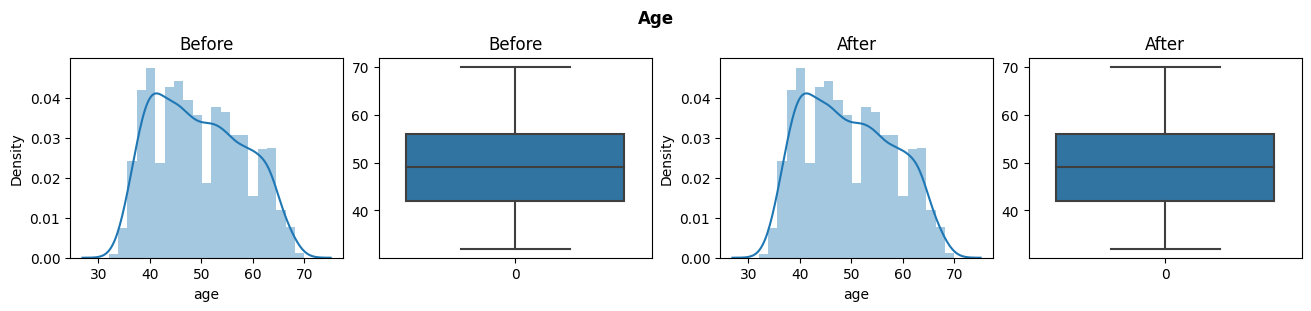

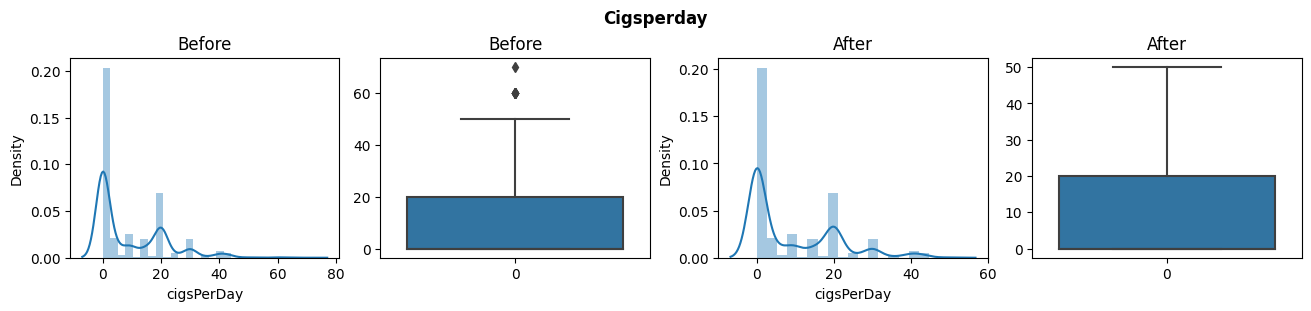

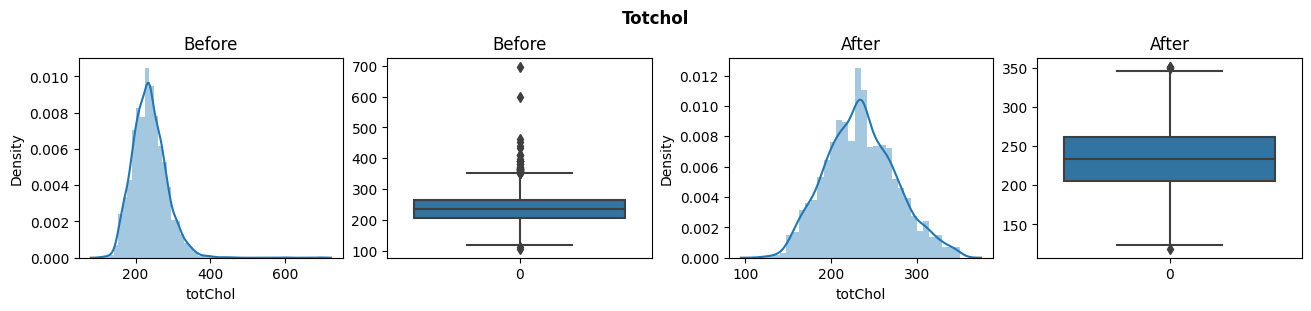

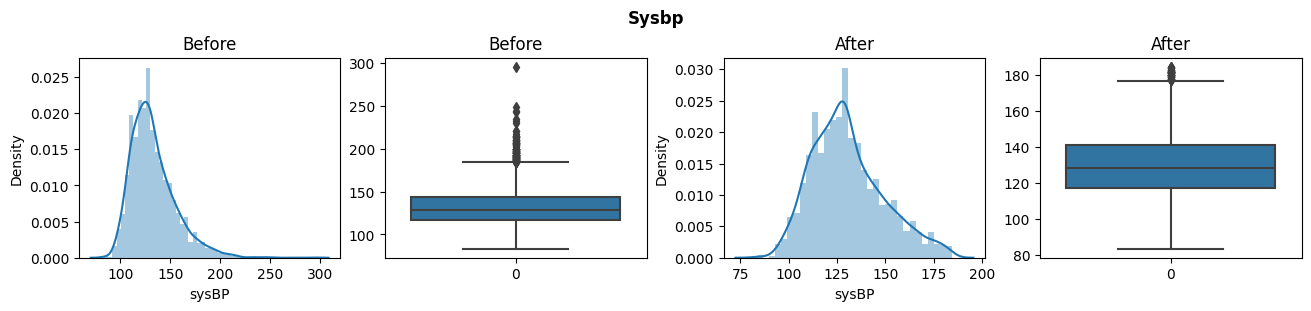

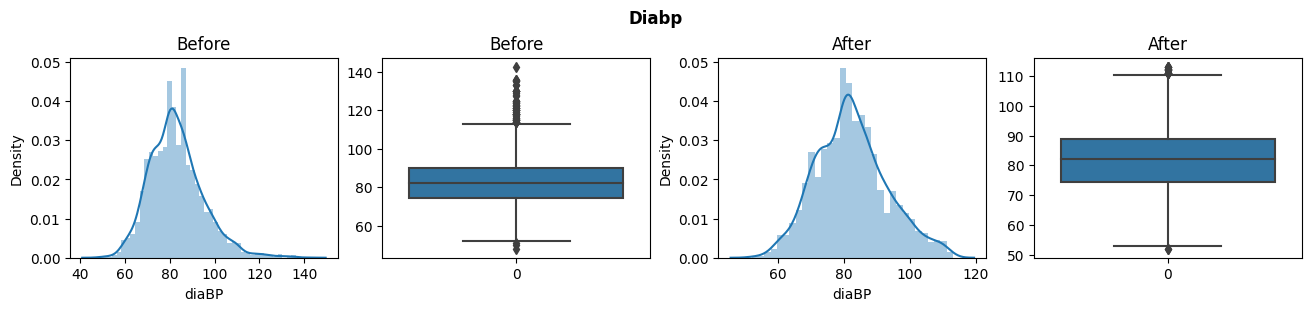

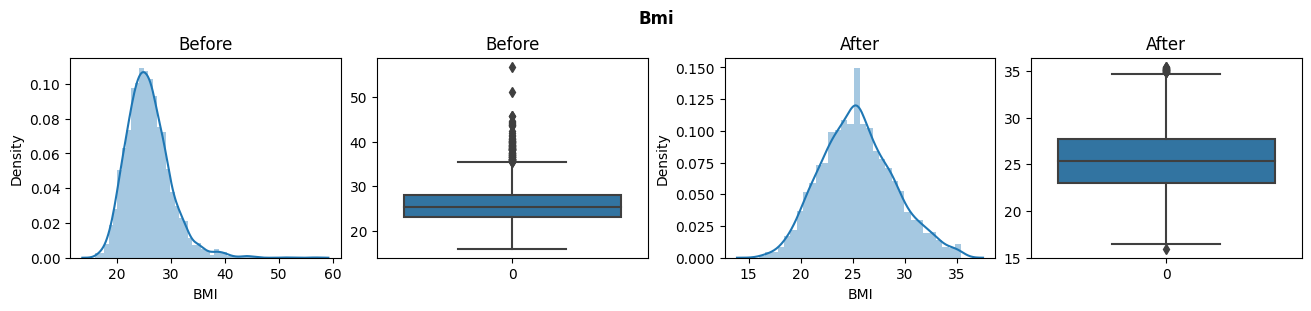

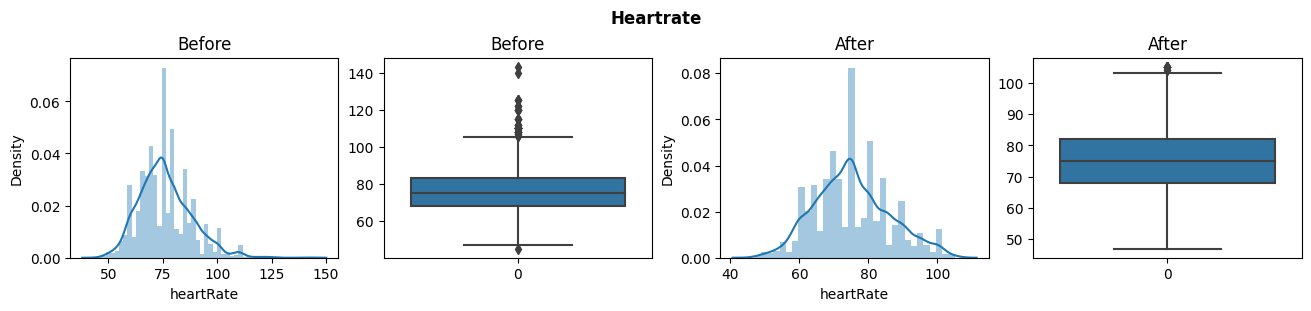

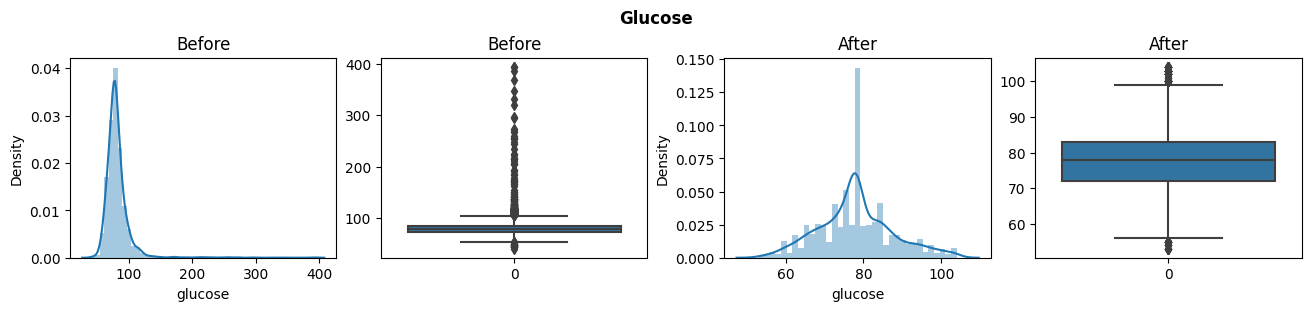

In [ ]:
# compare before the treatment data and after the treatment data

# Before the treatment
for col in continuous:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(13, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

  # After treating outliers
  sns.distplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()





### **What all outlier treatment techniques have you used and why did you use those techniques?**

### Here we are using **Capping** techniques by finding out the interquartile range(IQR), upper and lower limit and median of individual column. In this capping technique, we replace all the values above the upper limit and below the lower limit with the median value of IQR.

### **3. Categorical Encoding**

In [ ]:
# Encode your categorical columns
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [ ]:
# There are only 2 columns whose datatype is object.
# Here we replace the text value with 0 and 1

categorical_encoding = {'sex': {'M': 1,'F': 0},'is_smoking': {'YES':1, 'NO': 0}}

# Replace these 2 object column with numerical number.
df = df.replace(categorical_encoding)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


### **What all categorical encoding techniques have you used & why did you use those techniques?**

### There are so many techniques like dummification, hot encoding , label encoding for dummifying the categorical values into numerical. But here we manually replace the values with 0 and 1.


### **4. Feature Manipulation & Selection**

### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Here we are using the Vif to remove the multi-collinearity from our dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):

  # Calculating Vif

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


  return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))



In [ ]:
independent_variable = [i for i in df.describe().columns if i not in ['TenYearCHD']]
cal_vif(df[independent_variable])

variables         VIF
0             sysBP  135.092939
1             diaBP  131.558282
2               BMI   44.642973
3               age   41.218104
4         heartRate   38.777048
5           totChol   30.804073
6           glucose   20.541106
7        is_smoking    4.836168
8         education    4.762194
9        cigsPerDay    4.105001
10     prevalentHyp    2.413186
11              sex    2.123738
12         diabetes    1.583344
13           BPMeds    1.133726
14  prevalentStroke    1.027138

In [ ]:
# We are removing the column one by one after running the cell again and again.
# Removing all those columns whose Vif value is greater than 5.
independent_variable = [i for i in df.describe().columns if i not in ['TenYearCHD','sysBP', 'diaBP','BMI','age','heartRate','totChol','glucose']]
cal_vif(df[independent_variable])

variables       VIF
0       is_smoking  4.489522
1       cigsPerDay  4.048735
2        education  2.152622
3              sex  1.888470
4     prevalentHyp  1.427056
5           BPMeds  1.120078
6         diabetes  1.033502
7  prevalentStroke  1.022268

In [ ]:
# Here the vif value of 'is_smoking' column is under 5 but still we remove this column because is_smoking and 'cigsperday' are highly coorelate with each other.

independent_variable = [i for i in df.describe().columns if i not in ['TenYearCHD','sysBP', 'diaBP','BMI','heartRate','totChol','glucose', 'is_smoking','cigsPerDay']]
cal_vif(df[independent_variable])

variables       VIF
0              age  5.381484
1        education  4.075112
2              sex  1.727826
3     prevalentHyp  1.678405
4           BPMeds  1.120364
5         diabetes  1.042761
6  prevalentStroke  1.023882

### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

new_data = df[independent_variable + ['TenYearCHD']]
new_data.columns

Index(['age', 'education', 'sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD'],
      dtype='object')

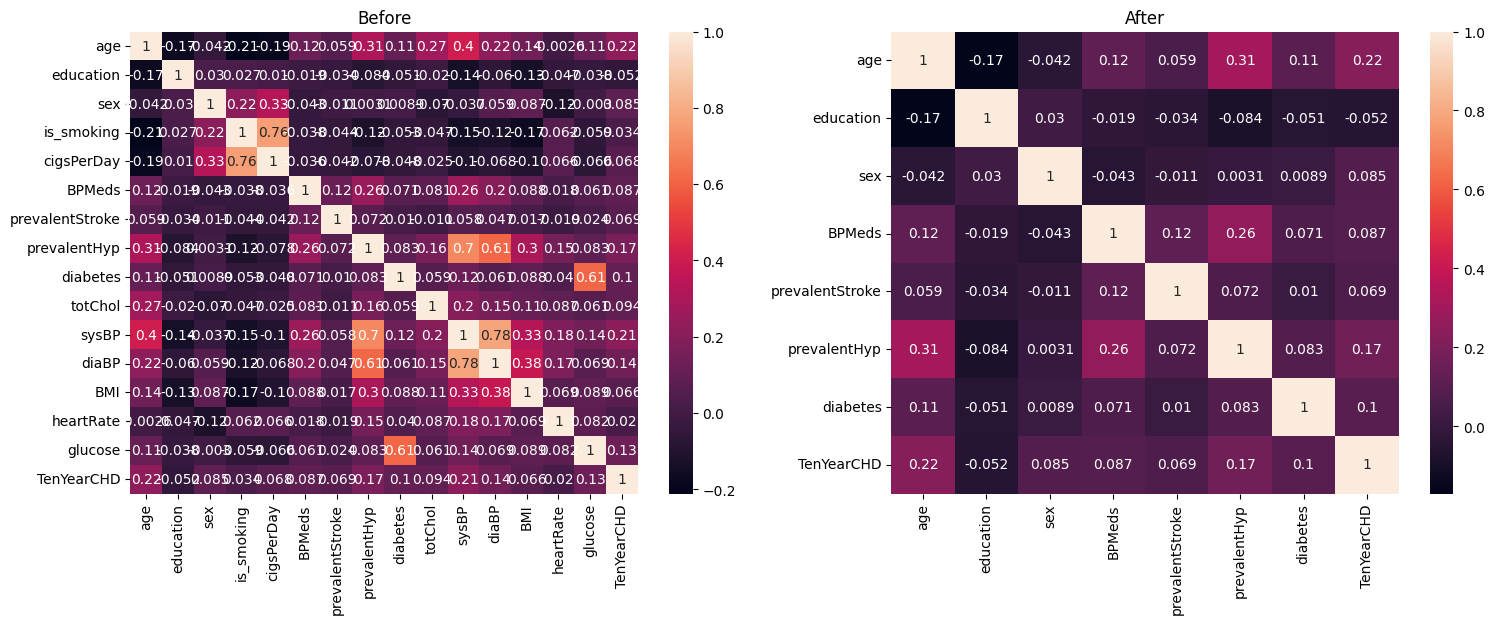

In [ ]:
# Before removing the multicollinearity
plt.figure(figsize=(18,6))
corr= df.corr()
plt.subplot(1,2,1)
sns.heatmap(corr,annot=True).set(title="Before")

# After removing the multicollinearity, the heat map looks like
# plt.figure(figsize=(10,5))
corr= new_data.corr()
plt.subplot(1,2,2)
sns.heatmap(corr, annot=True).set(title="After")
plt.show()

##### **What all feature selection methods have you used  and why?**

##### For removing the Multicollinearity, we used the variation inflation factor i.e Vif. we removed those columns whose vif value above than 5. We are not removing the columns in a single step as the code in the above cell shows. After removing the column, we again run the cell and check the vif value. This step is repeat untill the vif value of all the column reach under 5.  

##### **Which all features you found important and why?**

After removing so many columns, there are 6 independent variable and 1 dependent variables are remaining in our dataset.

All 6 independent variables are not coorelated or very less coorelated with each other.

### **5. Data Scaling**

In [ ]:
# Scaling your data

scaler = MinMaxScaler()
X= scaler.fit_transform(df[independent_variable])
y = df['TenYearCHD']

scoring = make_scorer(f1_score, pos_label=1)

##### **Which method have you used to scale you data and why?**

**Normalization** the independent variable by using MinMaxScaler technique. By using this technique, we are converting all numerical values in between 0 to 1.

### **6. Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state= 1)
# test train

##### **What data splitting ratio have you used and why?**

We split the data 80 by 20 in ratio terms. 80% Train data and 20% Test data.
splitted in random state = 0.

### **7. Handling Imbalanced Dataset**

##### **Do you think the dataset is imbalanced? Explain Why.**

Yes, our dataset is imbalanced. Acc. to our dataset, more number of peoples have negative for ten year cardiovascular risk in future. only few number of peoples have positive for CHD risk in future. This huge no. of gap creates a imbalance in our dataset. If we use this dataset in our ML model then our accuracy, precision and recall will not give the correct result. Because, these will tend towards the majority class and neglect the minority class.

In [ ]:
# Handling Imbalanced Dataset (If needed)

# Here the count of 0 values is 2305 while the count of 1 value is 407. so, the class is imbalance.

y_train.value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [ ]:
# Before class imbalance,

print("Before class imbalance,\n The shape of X_train is",X_train.shape, "\n and y_train is:", y_train.shape)
print("---"*12)
print("The count of y_train is \n",y_train.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('\n')
print("---"*12)
print("---"*12)
print('\n')

# After class imbalance

print("After class imbalance technique,\n The shape of X_smote is",X_smote.shape, "\n and y_smote is:", y_smote.shape)
print("---"*12)
print("The count of y_smote is \n",y_smote.value_counts())

Before class imbalance,
 The shape of X_train is (2712, 7) 
 and y_train is: (2712,)
------------------------------------
The count of y_train is 
 0    2303
1     409
Name: TenYearCHD, dtype: int64


------------------------------------
------------------------------------


After class imbalance technique,
 The shape of X_smote is (4606, 7) 
 and y_smote is: (4606,)
------------------------------------
The count of y_smote is 
 0    2303
1    2303
Name: TenYearCHD, dtype: int64


##### **What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**

We are using the **SMOTE** technique for balanced the dataset to get the accuracy, precision , Recall more accurate. In this method, we oversampling the minority class of data and get the data equal.

## ***7. ML Model Implementation***

In [ ]:
# Create a function for implementation and evaluation of model.

def ml_model(model, x_train, x_test, y_train, y_test):

  # Fit the model
  mod = model.fit(x_train,y_train)

  # Predict the train model
  y_train_pred = mod.predict(x_train)
  print("Model performance of Training set")
  print("- Accuracy score:",round(accuracy_score(y_train,y_train_pred),2))
  print("- Precision score:",round(precision_score(y_train,y_train_pred),2))
  print("- Recall score:",round(recall_score(y_train,y_train_pred),2))
  print("- F1 score:",round(f1_score(y_train,y_train_pred),2))
  print("- ROC-AUC score:",round(roc_auc_score(y_train,y_train_pred),2))

  print("---"*10)

  #Predict the test model
  y_test_pred = mod.predict(x_test)
  print("Model performance of Test set")
  print("- Accuracy score:",round(accuracy_score(y_test,y_test_pred),2))
  print("- Precision score:",round(precision_score(y_test,y_test_pred),2))
  print("- Recall score:",round(recall_score(y_test,y_test_pred),2))
  print("- F1 score:",round(f1_score(y_test,y_test_pred),2))
  print("- ROC-AUC score:",round(roc_auc_score(y_test,y_test_pred),2))


  for a, b, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Predict the model
    pred = mod.predict(a)
    # pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=b, output_dict=True))
    # fpr, tpr, _ = roc_curve(b, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=b, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')




# **ML Model 1- Logistic Regression**

LOGISTIC REGRESSION
 
Model performance of Training set
- Accuracy score: 0.65
- Precision score: 0.65
- Recall score: 0.65
- F1 score: 0.65
- ROC-AUC score: 0.65
------------------------------
Model performance of Test set
- Accuracy score: 0.65
- Precision score: 0.26
- Recall score: 0.71
- F1 score: 0.38
- ROC-AUC score: 0.68


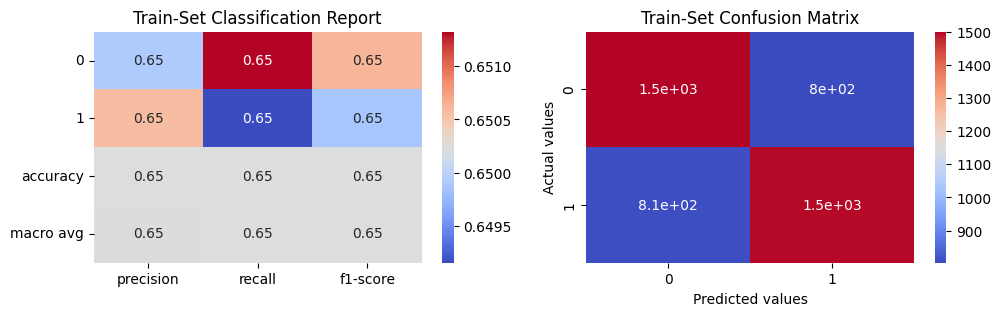

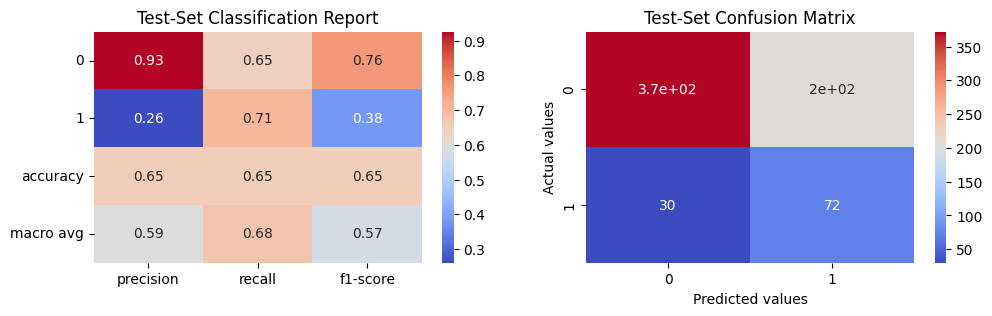

In [ ]:
# ML Model - 1 Implementation

print("LOGISTIC REGRESSION")
print(" ")
lr = LogisticRegression(max_iter = 10000)

# Fit the model in function that we create above

ml_model(lr,X_smote,X_test, y_smote, y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hence this is the sensitive data where we predict the future risk of CHD, so we need more Recall value. More the value of recall, less will be the false negative.

With the implementation of Logistic regression model, our **Recall value is 0.71** in test data as we see in the classification report and in the confusion matrix, the **FN value is 30**.

# **ML Model 2 - KNN Classifier**

KNN CLASSIFIER
 
Model performance of Training set
- Accuracy score: 0.79
- Precision score: 0.88
- Recall score: 0.66
- F1 score: 0.76
- ROC-AUC score: 0.79
------------------------------
Model performance of Test set
- Accuracy score: 0.79
- Precision score: 0.33
- Recall score: 0.41
- F1 score: 0.37
- ROC-AUC score: 0.63


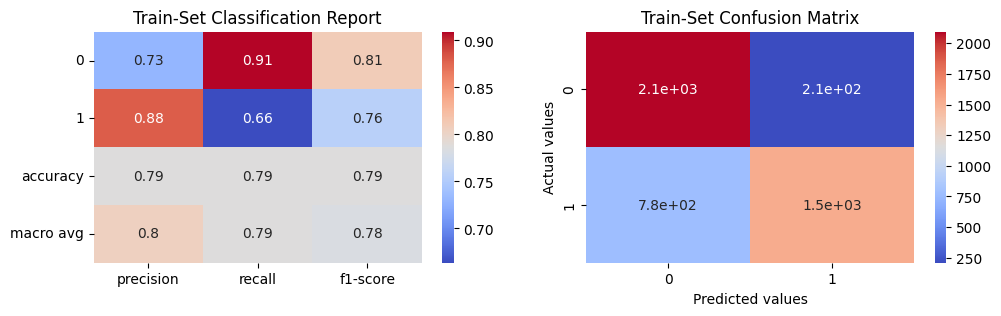

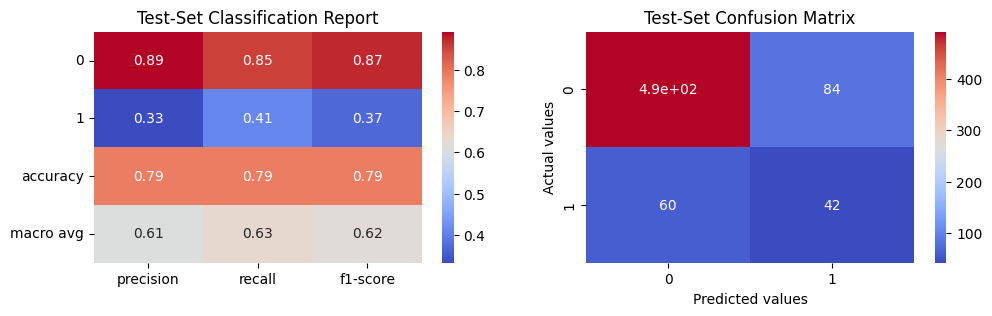

In [ ]:
# ML Model - 2 Implementation

print("KNN CLASSIFIER")
print(" ")

knn = KNeighborsClassifier( )

# Fit the model in function that we create above

ml_model(knn,X_smote,X_test, y_smote, y_test)


#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart**.

With the help of **KNN classifier model**, the classification report and confusion matrix is defined above.

Without using any hyperparameters, the **Recall value** is **0.41**

### **2. Cross- Validation & Hyperparameter Tuning**

Model performance of Training set
- Accuracy score: 0.71
- Precision score: 0.7
- Recall score: 0.75
- F1 score: 0.73
- ROC-AUC score: 0.71
------------------------------
Model performance of Test set
- Accuracy score: 0.65
- Precision score: 0.26
- Recall score: 0.71
- F1 score: 0.38
- ROC-AUC score: 0.67


Best n_neighbors: 27
Best p: manhattan
Algorithm: auto


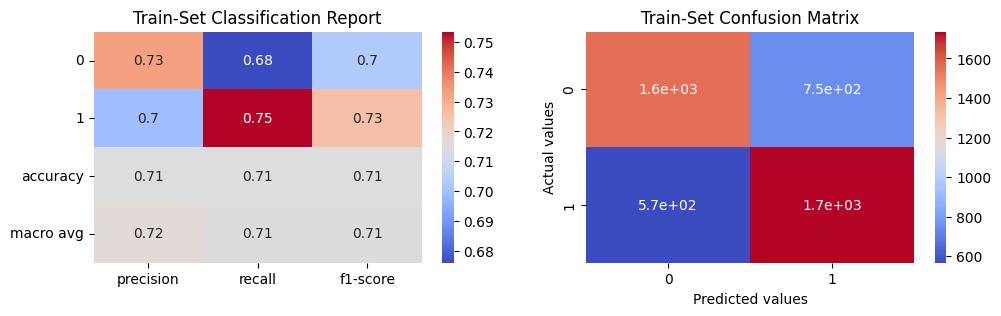

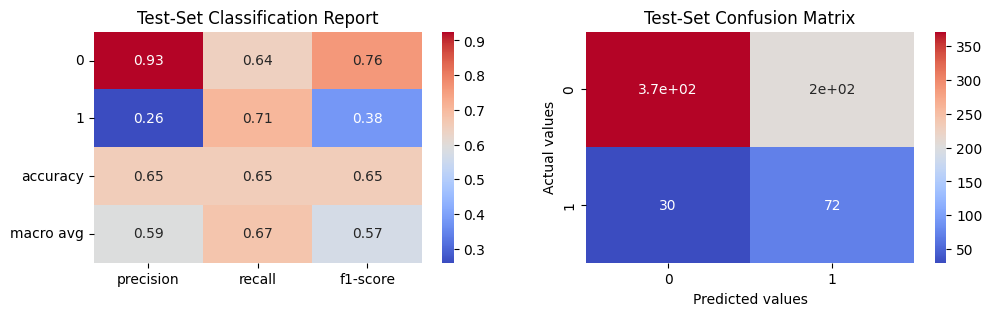

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# HYperparameter Grid

grid = {'n_neighbors' : list(range(1,30)),
        'metric' : ['minkowski','euclidean','manhattan'],'algorithm': ['auto']}

# GridSearch to find the best parameters
Knn = GridSearchCV(knn, param_grid = grid, scoring = scoring, cv=5)


# Fit the Algorithm
Knn.fit(X_smote, y_smote)


# Predict on the model
ml_model(Knn.best_estimator_,X_smote,X_test, y_smote, y_test)

print('\n')
# Best parameters used in model
print('Best n_neighbors:', Knn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', Knn.best_estimator_.get_params()['metric'])
print('Algorithm:', Knn.best_estimator_.get_params()['algorithm'])


#### **Which hyperparameter optimization technique have you used and why?**

**We are using these 3 hyperparameters for improving our model.**

Best n_neighbors: 27

Best p: manhattan

Algorithm: auto

with the using of these hyperparameters, we improve our **Recall value** from **0.41 to 0.71**

#### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The improvement of Recall value from **0.41 to 0.71**

#### **3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

Hence this is the sensitive data where we predict the future risk of CHD, so we need more Recall value. More the value of recall, less will be the false negative.

With the implementation of **KNN classifier model**, our **Recall value** improve from **0.41 to 0.71** as we see in the classification report and in the confusion matrix, the **FN value is 30** in test data.

# **Model 3 - Naive Bayes Classifier**

Naive Bayes Classifier
 
Model performance of Training set
- Accuracy score: 0.57
- Precision score: 0.7
- Recall score: 0.26
- F1 score: 0.38
- ROC-AUC score: 0.57
------------------------------
Model performance of Test set
- Accuracy score: 0.8
- Precision score: 0.34
- Recall score: 0.34
- F1 score: 0.34
- ROC-AUC score: 0.61


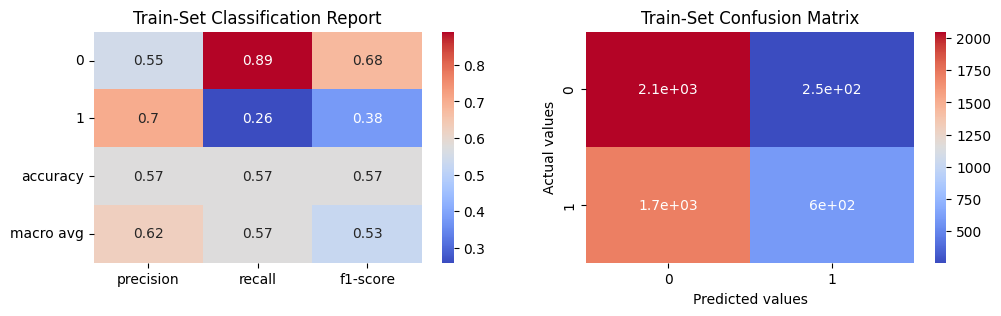

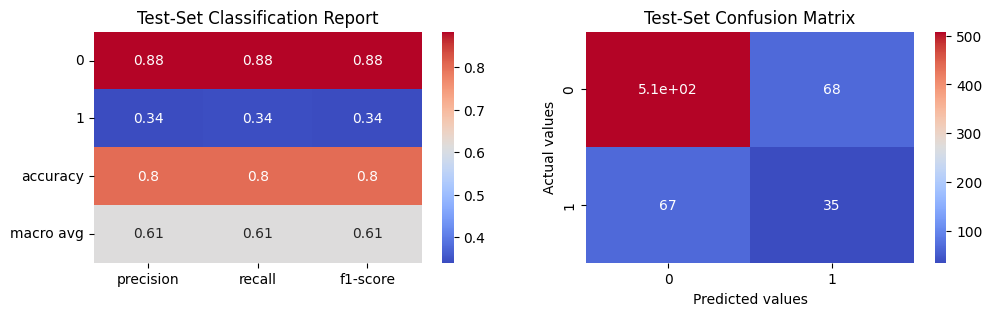

In [ ]:
# # ML Model - 3 Implementation

print ("Naive Bayes Classifier")
print(" ")
nbc = GaussianNB()

# Predict on the model
ml_model(nbc,X_smote,X_test, y_smote, y_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

With the help of **Naive Bayes classifier Model**, the classification report and confusion matrix is defined above.

Without using any hyperparameters, the **Recall value** is **0.34**

#### **2. Cross- Validation & Hyperparameter Tuning**

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model performance of Training set
- Accuracy score: 0.63
- Precision score: 0.67
- Recall score: 0.5
- F1 score: 0.57
- ROC-AUC score: 0.63
------------------------------
Model performance of Test set
- Accuracy score: 0.71
- Precision score: 0.28
- Recall score: 0.58
- F1 score: 0.38
- ROC-AUC score: 0.66


GaussianNB(var_smoothing=0.657933224657568)


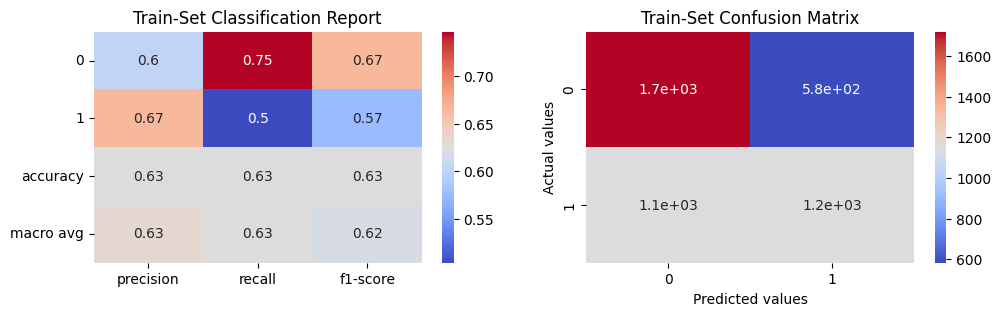

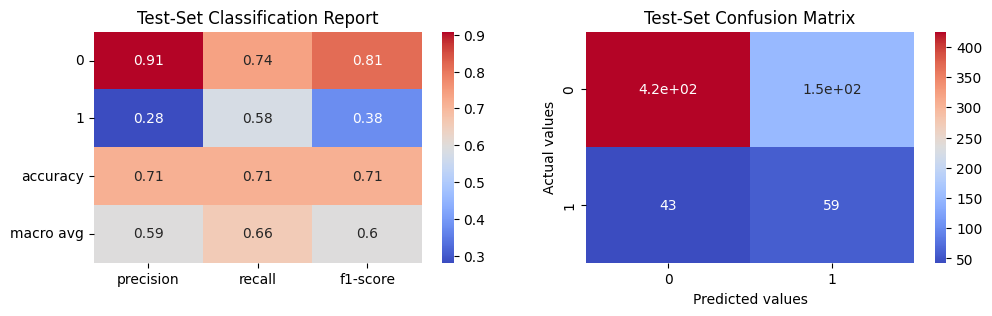

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# HYperparameter Grid
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(nbc, param_grid=param_grid_nb, verbose=1,  scoring = scoring, cv=10, n_jobs= -1)

# Predict on the model
ml_model(nbModel_grid,X_smote,X_test, y_smote, y_test)

print('\n')

# print('Best kernel:', nbModel_grid.best_estimator_.get_params()['kernel'])
# print('Best c:', nbModel_grid.best_estimator_.get_params()['C'])
# print('Best gamma:', nbModel_grid.best_estimator_.get_params()['gamma'])

print(nbModel_grid.best_estimator_)

##### **Which hyperparameter optimization technique have you used and why?**

We are using **var_smoothing=0.6579** in hyperparameters for improving our model.



with the using of these hyperparameters, we improve our **Recall value** from **0.34 to 0.58**

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The improvement of Recall value from **0.34 to 0.58**

#### **3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

Hence this is the sensitive data where we predict the future risk of CHD, so we need more Recall value. More the value of recall, less will be the false negative.

With the implementation of **Naive Bayes classifier Model**, our **Recall value** improve from **0.34 to 0.58** as we see in the classification report and in the confusion matrix, the **FN value is 43** in test data.

# **ML Model 4 - Support Vector Classifier**

SUPPORT VECTOR CLASSIFIER
 
Model performance of Training set
- Accuracy score: 0.65
- Precision score: 0.65
- Recall score: 0.67
- F1 score: 0.66
- ROC-AUC score: 0.65
------------------------------
Model performance of Test set
- Accuracy score: 0.65
- Precision score: 0.26
- Recall score: 0.72
- F1 score: 0.38
- ROC-AUC score: 0.68


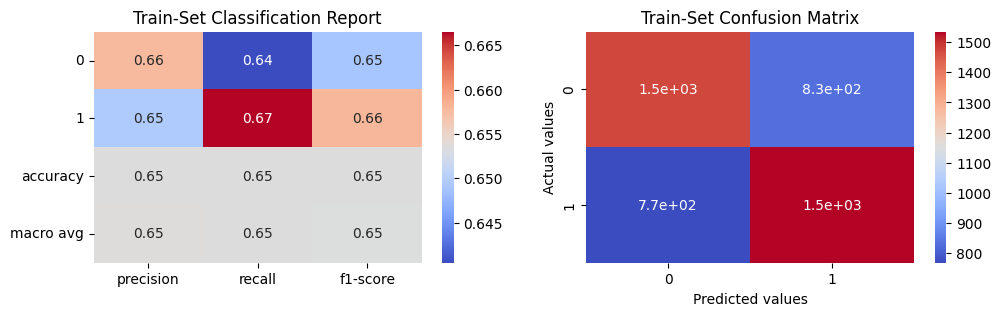

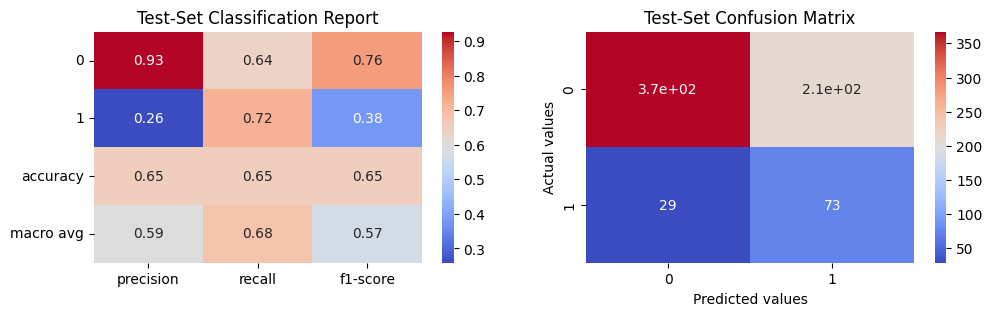

In [ ]:
# ML Model - 3 Implementation

print ("SUPPORT VECTOR CLASSIFIER")
print(" ")
svm = SVC(kernel = 'linear', probability=True)

# Predict on the model
ml_model(svm,X_smote,X_test, y_smote, y_test)

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

With the help of **Support vector classifier model**, the classification report and confusion matrix is defined above.

Without using any hyperparameters, the **Recall value** is **0.72**

#### **2. Cross- Validation & Hyperparameter Tuning**

Model performance of Training set
- Accuracy score: 0.62
- Precision score: 0.6
- Recall score: 0.72
- F1 score: 0.65
- ROC-AUC score: 0.62
------------------------------
Model performance of Test set
- Accuracy score: 0.53
- Precision score: 0.22
- Recall score: 0.8
- F1 score: 0.34
- ROC-AUC score: 0.64


Best kernel: rbf
Best c: 0.1
Best gamma: scale


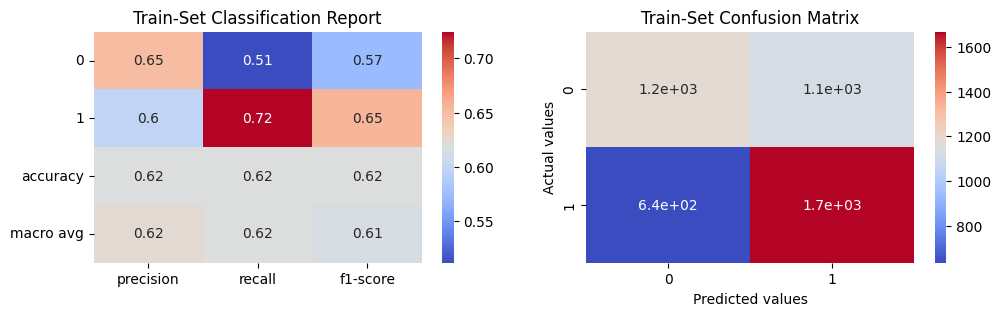

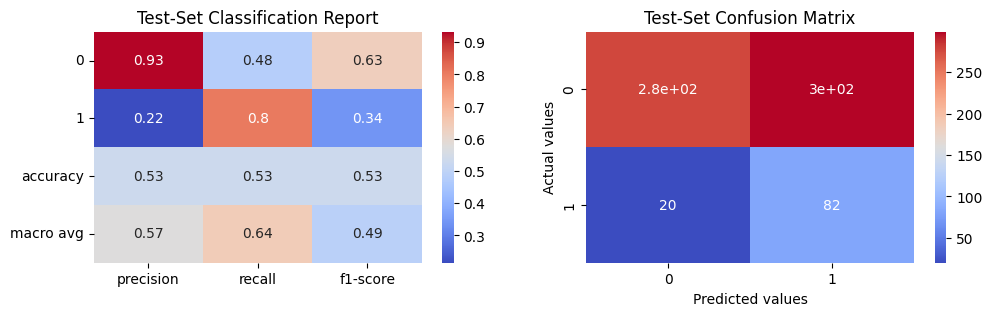

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# HYperparameter Grid

grid = {'kernel' : ['linear','rbf'],
        'C': [0.1,1,10,100], 'max_iter' : [1000]}
# GridSearch to find the best parameters
clf = GridSearchCV(svm, param_grid = grid, refit = True, scoring = scoring, cv=5)

# Fit the Algorithm
clf.fit(X_smote, y_smote)

# Predict on the model
ml_model(clf.best_estimator_,X_smote,X_test, y_smote, y_test)

print('\n')

print('Best kernel:', clf.best_estimator_.get_params()['kernel'])
print('Best c:', clf.best_estimator_.get_params()['C'])
print('Best gamma:', clf.best_estimator_.get_params()['gamma'])

##### **Which hyperparameter optimization technique have you used and why?**

**We are using these 2 hyperparameters for improving our model.**

Best kernel: linear

Best c: 0.1

with the using of these hyperparameters, we improve our **Recall value** from **0.72 to 0.80**

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The improvement of Recall value from **0.72 to 0.80**

#### **3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

Hence this is the sensitive data where we predict the future risk of CHD, so we need more Recall value. More the value of recall, less will be the false negative.

With the implementation of **Support vector classifier**, our **Recall value** improve from **0.72 to 0.80** as we see in the classification report and in the confusion matrix, the **FN value is 20** in test data.

# **Comparison of precision, recall, F1 score and Accuraccy score of all four models**

In [ ]:
# Model- 1 Logistic Regression

# Fit the model
lr.fit(X_smote, y_smote)

#Predict the test model
lr_pred = lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test,lr_pred),2)
lr_precision = round(precision_score(y_test,lr_pred),2)
lr_recall_score = round(recall_score(y_test,lr_pred),2)
lr_F1_score = round(f1_score(y_test,lr_pred),2)



# Model 2 KNN clasifier
grid = {'n_neighbors' : [27],
        'metric' : ['manhattan'],'algorithm': ['auto']}
Knn = GridSearchCV(knn, param_grid = grid, scoring = scoring, cv=5)

# Fit the model
Knn.fit(X_smote, y_smote)

#Predict the test model
knn_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test,knn_pred),2)
knn_precision = round(precision_score(y_test,knn_pred),2)
knn_recall_score = round(recall_score(y_test,knn_pred),2)
knn_F1_score = round(f1_score(y_test,knn_pred),2)




# Model 3 Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}
# nbModel_grid = GridSearchCV(nbc, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs= -1)

# Fit the model
nbModel_grid.fit(X_smote, y_smote)

#Predict the test model
nb_pred = nbModel_grid.predict(X_test)
nb_accuracy = round(accuracy_score(y_test,nb_pred),2)
nb_precision = round(precision_score(y_test,nb_pred),2)
nb_recall_score = round(recall_score(y_test,nb_pred),2)
nb_F1_score = round(f1_score(y_test,nb_pred),2)



# Model 4 Support vector classifier
grid = {'kernel' : ["rbf"],
        'C': [0.1],'max_iter' : [1000]}
# GridSearch to find the best parameters
clf = GridSearchCV(svm, param_grid = grid, refit = True, scoring = scoring, cv=5)

# Fit the Algorithm
clf.fit(X_smote, y_smote)

#Predict the test model
clf_pred = clf.predict(X_test)
clf_accuracy = round(accuracy_score(y_test,clf_pred),2)
clf_precision = round(precision_score(y_test,clf_pred),2)
clf_recall_score = round(recall_score(y_test,clf_pred),2)
clf_F1_score = round(f1_score(y_test,clf_pred),2)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:

Evaluation_report = pd.DataFrame(data={'Model':['Logistic Regression','KNN classifier','Naive Bayes', 'Support vector classifier'],
                                       'Precision':[lr_precision, knn_precision,nb_precision, clf_precision ],'Recall':[lr_recall_score,knn_recall_score,nb_recall_score, clf_recall_score],
                                       'F1_score':[lr_F1_score,knn_F1_score,nb_F1_score, clf_F1_score],'Accuracy':[lr_accuracy,knn_accuracy,nb_accuracy, clf_accuracy]})
Evaluation_report

Model  Precision  Recall  F1_score  Accuracy
0        Logistic Regression       0.26    0.71      0.38      0.65
1             KNN classifier       0.33    0.41      0.37      0.79
2                Naive Bayes       0.28    0.58      0.38      0.71
3  Support vector classifier       0.22    0.80      0.34      0.53

# **Conclusion**

### 1- We started with data information, data distribution, treated missing values, checked the correlation between each x- variable with y-variable.
### 2- Find the outlier by box plot. After finding, treat the outliers by 'Capping' method.
### 3- Smote technique used for class imbalance
### 4- Build 4 model i.e Logistic regression, KNN classifier, Naive Bayes classifier and Support vector classifier.
### 5- In this model, we want to predict the future risk of Coronary Heart Disease, so if we avoid any situation where patient has a **positive** for **CHD risk** and model predicts False Negative then we must **reduce** the **False Negative (FN)**
### 6- **High Recall** value means, **Less** will be the **FN**.  In this scenario, we use **Support vector classifier** which has a **highest Recall** value i.e **0.80**
### 7- If we want to avoid any situations in which person does not have a risk of CHD but model predicts **False Positive (FP)** then we must use that model who have **High Precision** value. High precision means, Less will be the FP.

## Highest Recall model - **Support vector classifier**.
## Highest Precision model - **KNN classifier**
## Highest F1 score model- **Naive Bayes classifier**
## Highest Accuracy model - **KNN classifier**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***